<a href="https://colab.research.google.com/github/bhavanajamalpur/Basics_git/blob/main/Word2Vec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [4]:
model = Word2Vec(sentences=data,vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    size = 50,
    window = 10,
    iter = 20,
)




In [5]:
# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()

Vector for love:
[-0.07128214  0.24255887  0.20920676  0.17605042 -0.6342401  -0.7580653
 -0.04640837  0.8483195  -0.35794276 -0.70327675  0.07549286 -0.49345648
 -0.30753186  0.19810261  0.41902205 -0.34942102  0.79013544 -0.5298546
  0.4931404  -1.1611856   0.3820739   0.5302081   0.43640724 -0.11709633
 -0.45600235  0.05983487 -0.59666306 -0.05848892 -0.5444092  -0.0673956
  1.2151225  -0.48217815  0.43608585 -0.7569524   0.10231509  0.22761673
  0.47202346 -0.29800144  0.25916445 -0.76124847 -0.5131733  -0.19929881
 -0.7339451  -0.15250777  0.44333184  0.1697245  -0.5528736  -0.11456758
  0.32047343 -0.29245323  0.4093838  -0.78819734 -0.31469068  0.01898978
  0.09793933  0.6039236  -0.09716569 -0.3226062  -0.26616862  0.34788314
  0.08453284  0.17172399  0.14289795  0.83804244 -0.60182273  0.42744416
 -0.3951705   0.50467646 -0.6551581   0.8088365  -0.15820257  0.21449964
  0.6639748   0.1191184   0.5256309   0.42635182  0.16363223 -0.4408788
 -0.3135986  -0.11931025 -0.2555263   

In [7]:
# Finding most similar words
print("3 words similar to car")
#similar_words = model.wv.most_similar("learning")
words = model.wv.most_similar("car", topn=3)
for word in words:
  print(word)
print()

3 words similar to car
('corner', 0.9612537026405334)
('train', 0.9515524506568909)
('room', 0.9502038359642029)



In [8]:
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

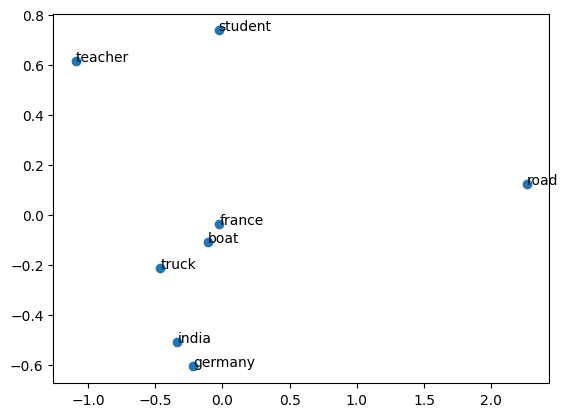

In [9]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()